# Pymaceuticals Inc.
---

### Analysis

- Capomulin proved to be a fine drug to reduce tumor growth.
- Capomulin had the highest number of studies, a part from Remicane, the rest of the regiments recorded a few death mice during the studies.
- The correlation between mouse weight and tumor volume is quite evident, as it appears the weight has an impact on the drug effectiveness.
- One potential outlier was spotted with the infubinol regiment. The majority of mice displayed an increase in volume for the tumor, while one had a suspicious reduction.

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = mouse_metadata.merge(study_results, how="left")

# Display the data table for preview
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [37]:
# Checking the number of mice.
num_mice = complete_data["Mouse ID"].nunique()

print("number of mice:", num_mice)

number of mice: 249


In [83]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = complete_data.loc[complete_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"]
duplicate_mouse_ids

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [84]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = complete_data.loc[complete_data["Mouse ID"] == "g989"]
duplicate_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [85]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = complete_data[complete_data["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [41]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = clean_data["Mouse ID"].nunique()

print("number of mice:", clean_num_mice)

number of mice: 249


## Summary Statistics

In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summ_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])


# mean
mean_tumor_volume = clean_data["Tumor Volume (mm3)"].mean()

# median
median_tumor_volume = clean_data["Tumor Volume (mm3)"].median()

# variance
variance_tumor_volume = clean_data["Tumor Volume (mm3)"].var()

# standard deviation
std_tumor_volume = clean_data["Tumor Volume (mm3)"].std()

# SEM 
sem_tumor_volume = clean_data["Tumor Volume (mm3)"].sem()



# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    "Mean": mean_tumor_volume,
    "Median": median_tumor_volume,
    "Variance": variance_tumor_volume,
    "Standard Deviation": std_tumor_volume,
    "SEM": sem_tumor_volume
}, index=["Tumor Volume (mm3)"])

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Tumor Volume (mm3),50.435293,48.933454,79.462907,8.914197,0.205591


In [107]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

agg_functions = {
    'Mean': 'mean',
    'Median': 'median',
    'Variance': 'var',
    'Standard Deviation': 'std',
    'SEM': lambda x: np.std(x) / np.sqrt(len(x)) 
}

summ_stats_advanced = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(agg_functions)

# Rename the columns
summ_stats_advanced.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

# Using the aggregation method, produce the same summary statistics in a single line


SpecificationError: nested renamer is not supported

## Bar and Pie Charts

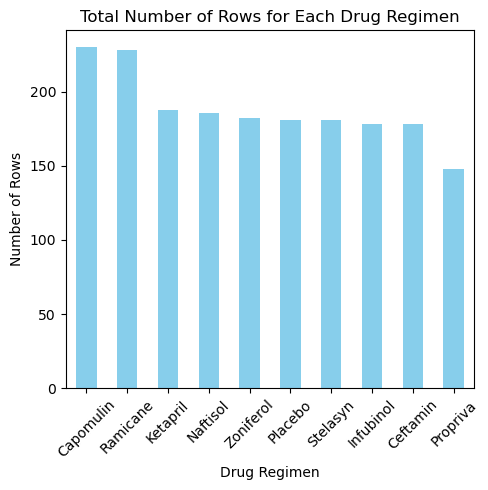

In [88]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_counts = clean_data['Drug Regimen'].value_counts()

# Create a bar plot
drug_regimen_counts.plot(kind='bar', figsize=(5, 5), color='skyblue')

# Add labels and title
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

plt.xticks(rotation=45)


# Show plot
plt.tight_layout()
plt.show()

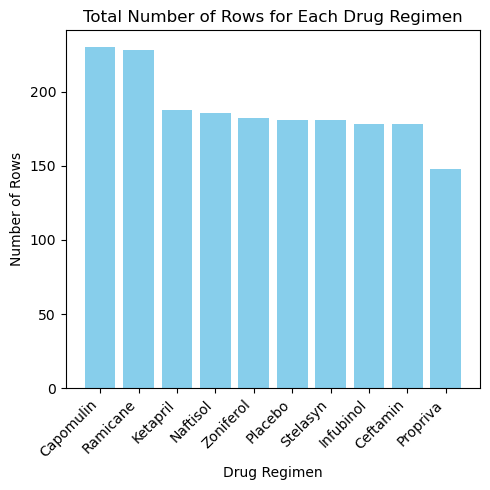

In [89]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimens = drug_regimen_counts.index
counts = drug_regimen_counts.values

# Create a bar plot
plt.figure(figsize=(5, 5))
plt.bar(regimens, counts, color='skyblue')

# Add labels and title
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

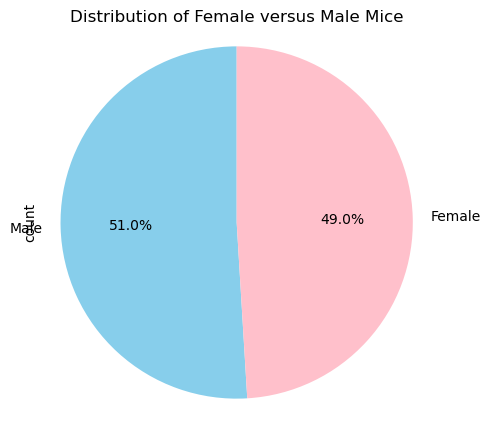

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the occurrences of each sex
sex_distribution = clean_data['Sex'].value_counts()

# Create a pie plot
sex_distribution.plot(kind='pie', figsize=(5, 5), autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])

# Add title
plt.title('Distribution of Female versus Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()

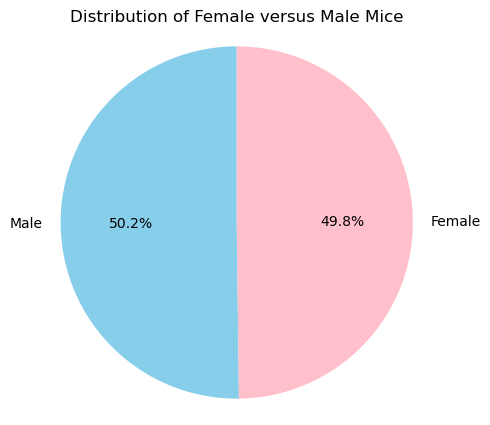

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create labels for the pie plot
labels = sex_distribution.index.tolist()

# Create values for the pie plot
sizes = sex_distribution.values.tolist()

# Create colors for each category
colors = ['skyblue', 'pink']

# Create a pie plot
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Distribution of Female versus Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()

## Quartiles, Outliers and Boxplots

In [92]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Display the DataFrame showing the final tumor volume for each mouse

final_tumor = clean_data.groupby(["Mouse ID"])["Timepoint"].max()
final_tumor = final_tumor.reset_index()

# Start by getting the last (greatest) timepoint for each mouse
merged_data = final_tumor.merge(clean_data, on=["Mouse ID", "Timepoint"],how="left")


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor = pd.merge(clean_data, last_timepoint_per_mouse, on=["Mouse ID", "Timepoint"])
final_tumor


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,s185,Capomulin,Female,3,17,0,45.0,0
2,x401,Capomulin,Female,16,15,0,45.0,0
3,m601,Capomulin,Male,22,17,0,45.0,0
4,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,0,45.0,0
244,z435,Propriva,Female,12,26,0,45.0,0
245,z581,Infubinol,Female,24,25,0,45.0,0
246,z795,Naftisol,Female,13,29,0,45.0,0


In [94]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
final_tumor_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    final_tumor_list.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"{drug} potential outliers: {outliers}")
    

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


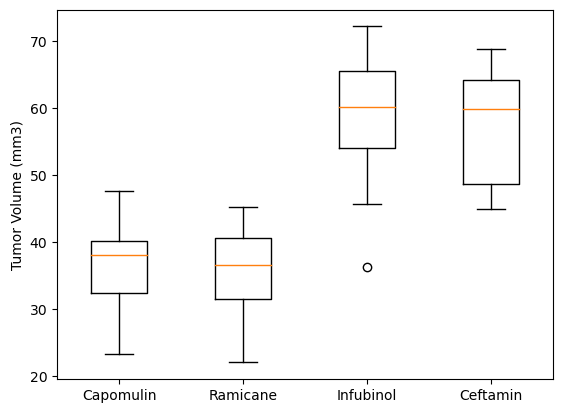

In [96]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(final_tumor_list, labels = treatments)
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

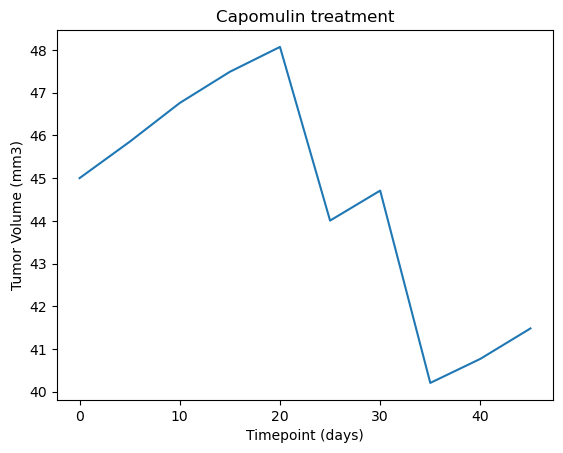

In [106]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
mouse_df = capomulin_data.loc[capomulin_data["Mouse ID"]== "l509"]
plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment")
plt.show()

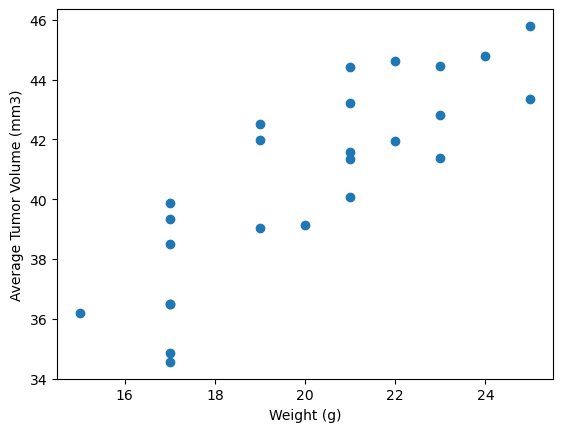

In [102]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
capomulin_avg = capomulin_data.groupby(["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)" ]].mean()
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average observed tumor volume is 0.84


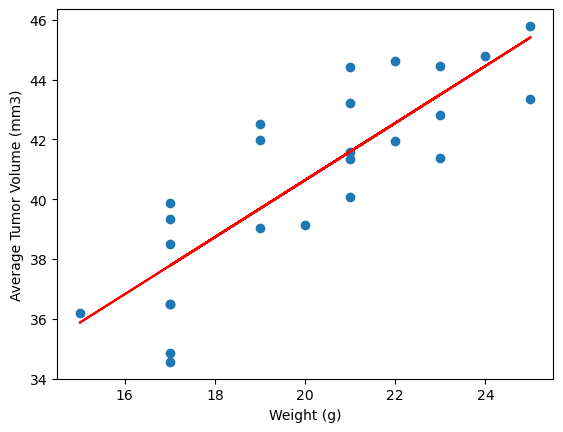

In [105]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corre = round(st.pearsonr(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average observed tumor volume is {corre}")
model = st.linregress(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])

y_values = capomulin_avg["Weight (g)"]*model[0]+model[1]
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.plot(capomulin_avg["Weight (g)"], y_values, color = "red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()